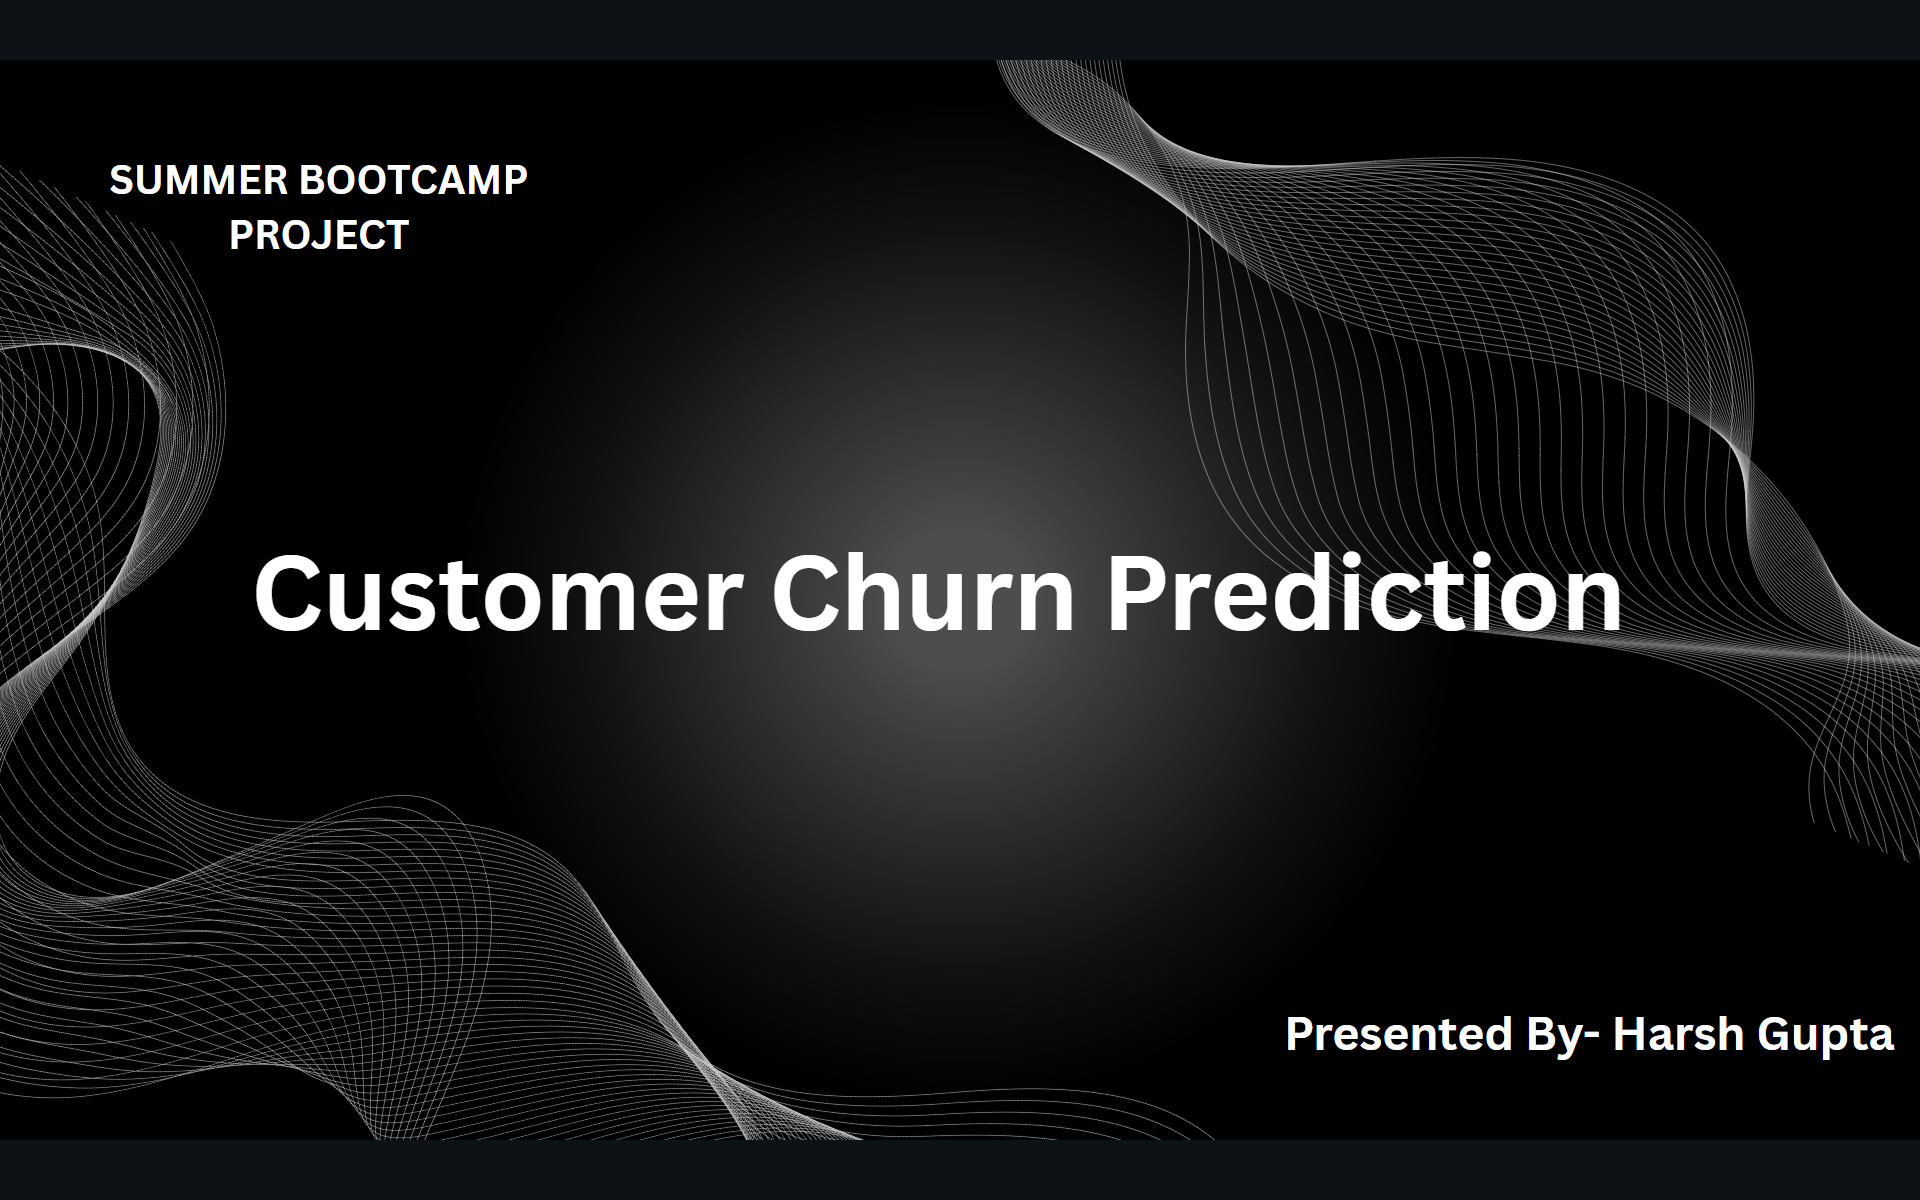

# problem statement
The goal of this project is to predict whether a bank customer will churn (i.e., leave the bank). This is a classic binary classification problem aimed at improving customer retention strategies.

#  Objective
To build and evaluate machine learning models that can accurately classify customers as likely to churn or not, using historical customer data.

#  Data Description
The dataset includes the following key features:
- **CreditScore**: Customer's credit score
- **Geography**: Customer's country
- **Gender**: Male or Female
- **Age**: Customer's age in years
- **Tenure**: Number of years the customer has been with the bank
- **Balance**: Bank balance
- **NumOfProducts**: Number of bank products used
- **HasCrCard**: Whether the customer has a credit card (1=yes, 0=no)
- **IsActiveMember**: Whether the customer is an active user (1=yes, 0=no)
- **EstimatedSalary**: Customer's estimated annual salary
- **Exited**: Target variable indicating churn (1=Yes, 0=No)

In [28]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns

- Task 1: Load the dataset into a pandas DataFrame and display the first few rows.

In [29]:
df=pd.read_csv('Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


Task 2: Summarize the dataset by providing basic statistics (mean, median, mode, standard deviation, etc.).

In [30]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000



- Task 3: Identify and handle missing values. Explain the chosen method for handling them.

In [31]:
df.isnull().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


- Task 4: Identify and handle duplicate rows if any.

In [32]:
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


# Data Visualization

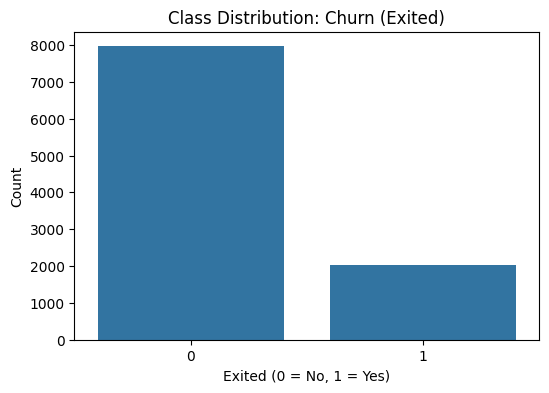

In [33]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Exited', data=df)
plt.title("Class Distribution: Churn (Exited)")
plt.xlabel("Exited (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

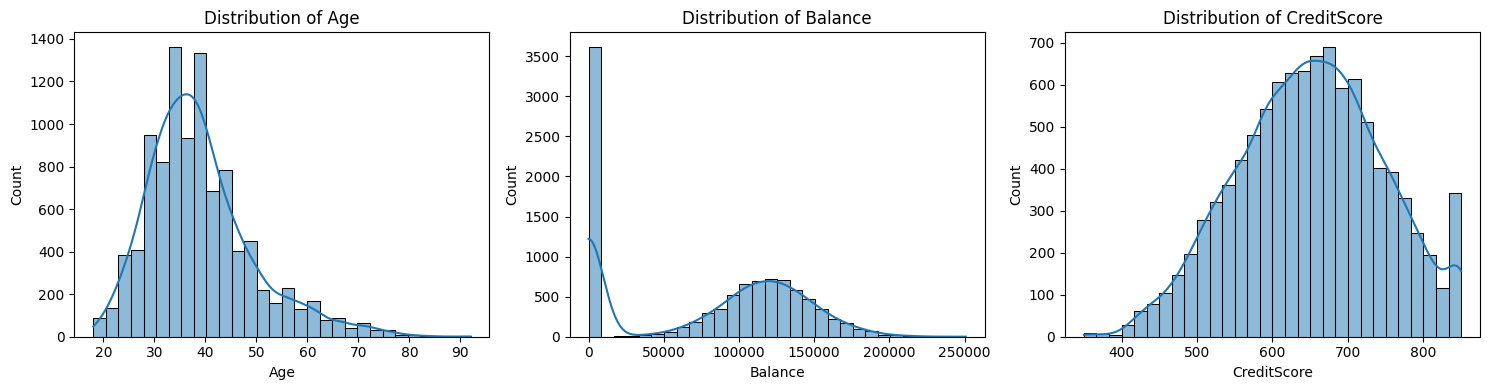

In [34]:
continuous_cols = ['Age', 'Balance', 'CreditScore']

plt.figure(figsize=(15, 4))
for i, col in enumerate(continuous_cols):
    plt.subplot(1, 3, i + 1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


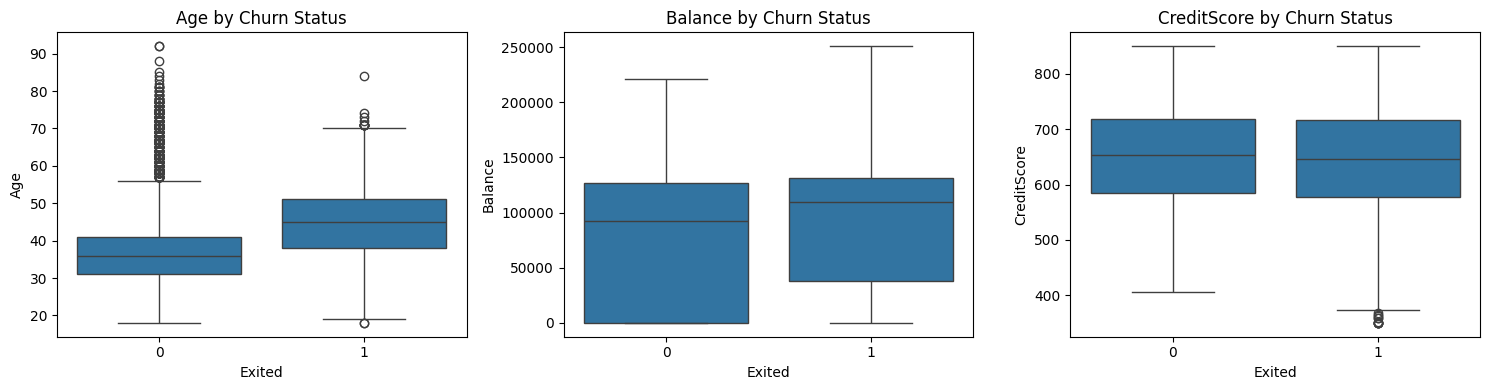

In [35]:
plt.figure(figsize=(15, 4))
for i, col in enumerate(continuous_cols):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(x='Exited', y=col, data=df)
    plt.title(f"{col} by Churn Status")
plt.tight_layout()
plt.show()

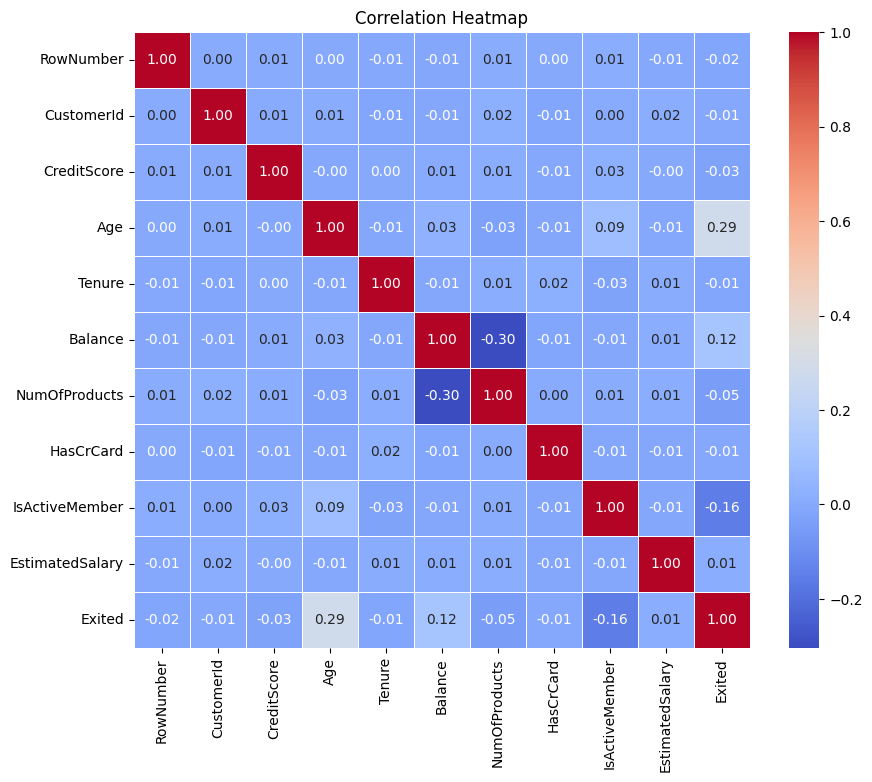

In [36]:
numeric_df = df.select_dtypes(include='number')
plt.figure(figsize=(10, 8))
corr_matrix = numeric_df.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()


In [37]:
x=df.iloc[:,3:-1].values
y=df.iloc[:,-1].values

- Task 5: Convert categorical variables to numerical values using appropriate encoding techniques (e.g., one-hot encoding, label encoding).

In [38]:
from sklearn.preprocessing import LabelEncoder
lb=LabelEncoder()
x[:,2]=lb.fit_transform(x[:,2])

In [39]:
print(x)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


In [40]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[1])],remainder='passthrough')
x=np.array(ct.fit_transform(x))

In [41]:
x

array([[1.0, 0.0, 0.0, ..., 1, 1, 101348.88],
       [0.0, 0.0, 1.0, ..., 0, 1, 112542.58],
       [1.0, 0.0, 0.0, ..., 1, 0, 113931.57],
       ...,
       [1.0, 0.0, 0.0, ..., 0, 1, 42085.58],
       [0.0, 1.0, 0.0, ..., 1, 0, 92888.52],
       [1.0, 0.0, 0.0, ..., 1, 0, 38190.78]], dtype=object)

-  Train and Test split

In [42]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

- Feature scaling

In [43]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

- Making our nueral network and training it

In [44]:
ann=tf.keras.Sequential()

In [45]:
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=16,activation='relu'))
ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
ann.add(tf.keras.layers.Dense(units=64,activation='relu'))
ann.add(tf.keras.layers.Dense(units=128,activation='relu'))
ann.add(tf.keras.layers.Dense(units=64,activation='relu'))
ann.add(tf.keras.layers.Dense(units=32,activation='relu'))
ann.add(tf.keras.layers.Dense(units=16,activation='relu'))
ann.add(tf.keras.layers.Dense(units=8,activation='relu'))
ann.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [46]:
ann.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [47]:
ann.fit(x_train,y_train,batch_size=32,epochs=300)

Epoch 1/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7987 - loss: 0.5136
Epoch 2/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7978 - loss: 0.4489
Epoch 3/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8160 - loss: 0.4156
Epoch 4/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8285 - loss: 0.4012
Epoch 5/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8385 - loss: 0.3889
Epoch 6/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8440 - loss: 0.3747
Epoch 7/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8576 - loss: 0.3547
Epoch 8/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8559 - loss: 0.3540
Epoch 9/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8600 - loss: 0.3470
Epoch 10/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8580 - loss: 0.3414
Epoch 11/300
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8612 - loss: 0.3463
Epoch 12/300
250/250 ━━━━━━━━━━━━━━━━━━━━

- Comparing predicted output from actual output

In [48]:
print(ann.predict(sc.transform([[1,0,0,600,1,40,3,60000,2,1,1,50000]]))>0.5)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
[[False]]


In [49]:
y_pred=ann.predict(x_test)
y_pred=(y_pred>0.5)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0 0]
 [0 1]
 [0 0]
 ...
 [1 0]
 [1 0]
 [0 0]]


- Evaluating our model

In [50]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm=confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)


[[1393  202]
 [ 174  231]]


0.812